# Analysis of Decentralised Iterative Auction Task Mutation

In [1]:
from __future__ import annotations

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from math import ceil
from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
folder = '../data/mutation'

## Random Mutation

In [3]:
results_filename = f'{folder}/task_mutation_paper_r_t30_s6_dt07-17_23-19-03.json'

with open(results_filename) as file:
    results_data = json.load(file)

def allocated(was_allocated, is_allocated):
    return sum(result["task allocated"] == was_allocated and result["mutant task allocated"] == is_allocated 
               for mutation_results in results_data for name, result in mutation_results.items() 
               if name != "no mutation" and name != "model")

print(f'Was allocated | Is Allocated | total ')
print(f'    True      |     True     |   {allocated(True, True)}')
print(f'    False     |     True     |   {allocated(False, True)}')
print(f'    True      |     False    |   {allocated(True, False)}')
print(f'    False     |     False    |   {allocated(False, False)}')

Was allocated | Is Allocated | total 
    True      |     True     |   0
    False     |     True     |   0
    True      |     False    |   262
    False     |     False    |   113


## Repeat decentralised iterative auction

In [4]:
repeat_filenames = [filename for filename in os.listdir(folder) if 'repeat_dia' in filename]

### Repeat results

repeat_dia_paper_r_t30_s6_dt09-18_12-11-12.json: 25


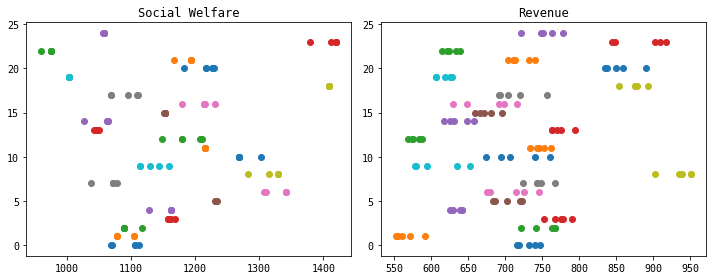

In [5]:
fig, (sw_ax, rev_ax) = plt.subplots(1, 2, figsize=(10, 4))
for repeat_filename in repeat_filenames:
    with open(f'{folder}/{repeat_filename}') as file:
        results_data = json.load(file)
        print(f'{repeat_filename}: {len(results_data)}')
    
    for i, results in enumerate(results_data):
        social_welfare = np.array([data['social welfare'] for name, data in results.items() if name != 'model'])
        revenue = np.array([data['total revenue'] for name, data in results.items() if name != 'model'])
        
        sw_ax.scatter(social_welfare, i * np.ones(len(social_welfare)))
        rev_ax.scatter(revenue, i * np.ones(len(revenue)))
sw_ax.set_title('Social Welfare')
rev_ax.set_title('Revenue')
plt.tight_layout()

### Repeat Task Prices

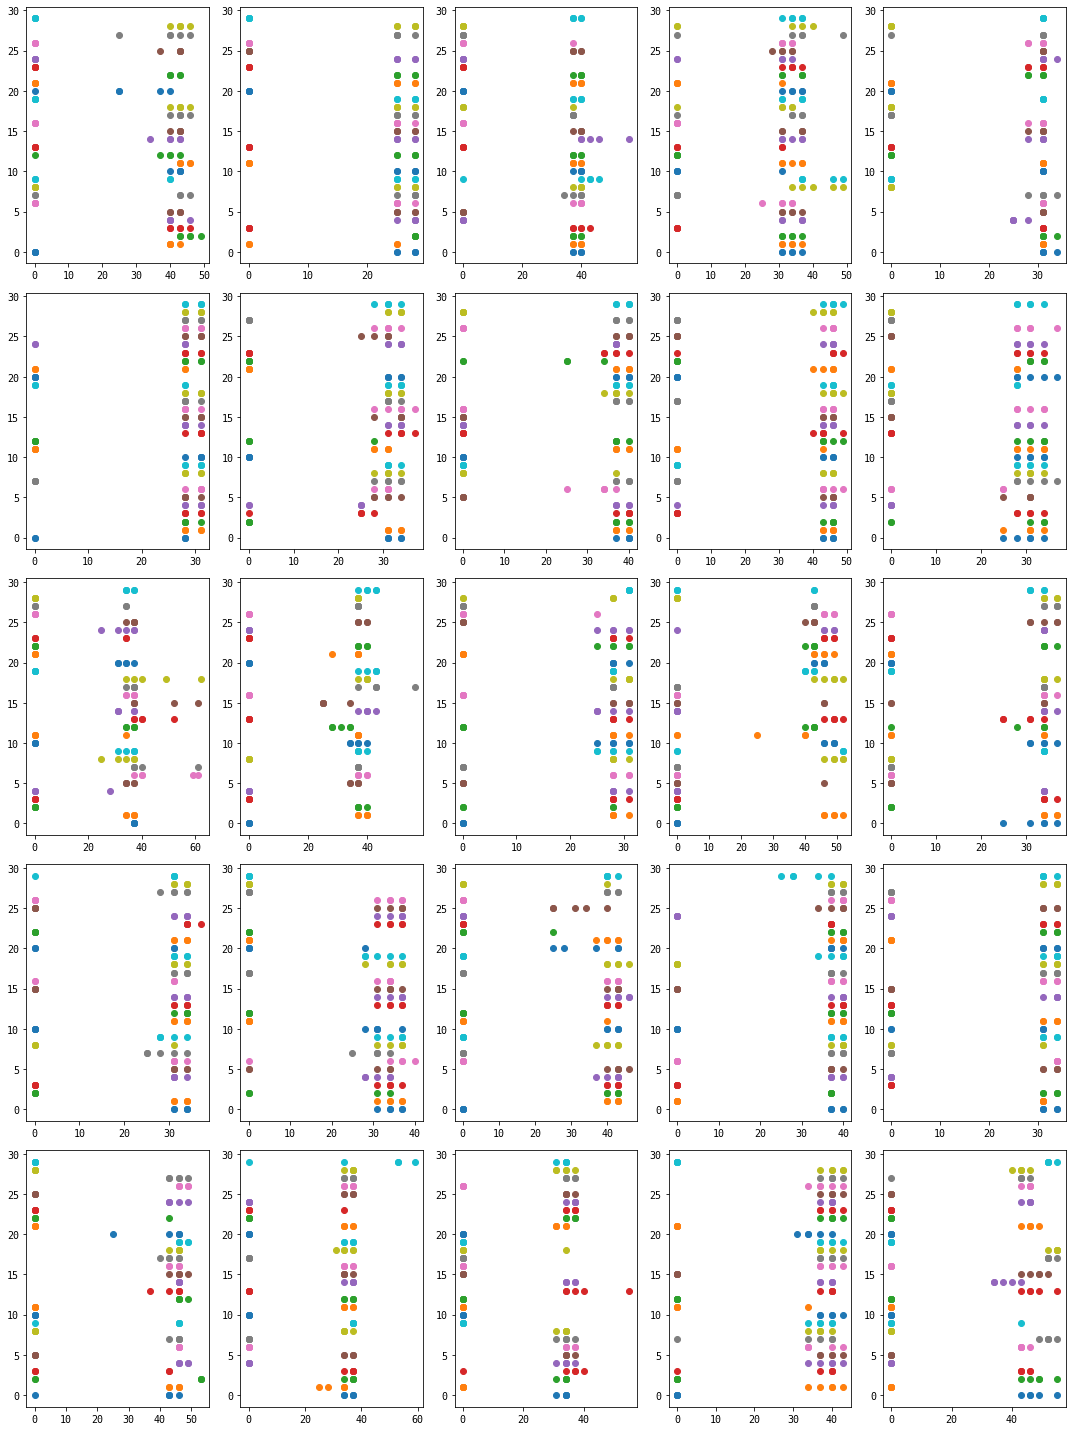

In [6]:
with open(f'{folder}/{repeat_filenames[0]}') as file:
    results_data = json.load(file)
cols = 5
fig, axs = plt.subplots(ceil(len(results_data) / cols), cols, figsize=(15, 20))
axs = axs.flatten()
for data, ax in zip(results_data, axs):
    for task_num in range(30):
        task_prices = [solution['task prices'][f'task {task_num}'] if f'task {task_num}' in solution['task prices'] else 0 
                       for name, solution in data.items() if name != 'model']
        ax.scatter(task_prices, task_num * np.ones(len(task_prices)))
plt.tight_layout()

### Task Prices histogram

{0, 3, 6, 9, 12, -3}


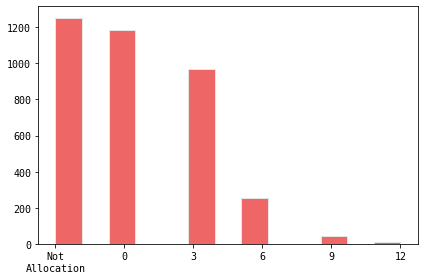

In [7]:
task_prices = []
for results_filename in repeat_filenames:
    with open(f'{folder}/{results_filename}') as file:
        results_data = json.load(file)
        
    for data in results_data:
        for task_num in range(30):
            prices = [solution['task prices'][f'task {task_num}'] if f'task {task_num}' in solution['task prices'] else 0 
                      for name, solution in data.items() if name != 'model']
            min_price = min((p for p in prices if 0 < p), default=-1)
            normalised_prices = [(p - min_price) if 0 < p else -3 for p in prices]
            task_prices += normalised_prices

task_prices = [p for p in task_prices if p <= 12]
print(set(task_prices))
ax = plt.subplot(111)
ax.hist(task_prices, bins=13, edgecolor='#E6E6E6', color='#EE6666')
plt.xticks(ticks=[-3, 0, 3, 6, 9, 12], 
           labels=['Not\nAllocation', '0', '3', '6', '9', '12'])
plt.tight_layout()

## Grid Search

In [8]:
grid_search_filenames = [filename for filename in os.listdir(folder) if 'mutation_grid_search' in filename]

In [9]:
for results_filename in grid_search_filenames:
    with open(f'{folder}/{results_filename}') as file:
        results_data = json.load(file)
    mutant_task = results_data['Mutation 0']['mutated task']
    # print(", ".join([task['name'] for task in results_data['model']['tasks']]))
    # print(results_data['no mutation']['task prices'])
    original_price = results_data['no mutation']['task price']
    allocation = [results["allocated"] for name, results in results_data.items() if name != "model" and name != "no mutation"]
    better_prices = [results["allocated"] and results["task price"] < original_price 
                     for name, results in results_data.items() if name != "model" and name != "no mutation"]
    print(f'Unmutated price: {original_price}, Allocations: {sum(allocation)} ({sum(allocation)/(len(results_data)-2):.3f}), '
          f'Better price: {sum(better_prices)} ({sum(better_prices)/(len(results_data)-2):.3f}), '
          f'Total: {len(results_data)-2} ({results_filename.replace(r"mutation_grid_search_paper_", "")})')

Unmutated price: 34, Allocations: 0 (0.000), Better price: 0 (0.000), Total: 504 (r0_t30_s6_dt07-26_08-10-07.json)
Unmutated price: 36, Allocations: 720 (1.000), Better price: 269 (0.374), Total: 720 (r0_t30_s6_dt07-30_12-08-50.json)
Unmutated price: 30, Allocations: 438 (0.603), Better price: 0 (0.000), Total: 726 (r0_t30_s6_dt09-18_14-04-06.json)
Unmutated price: 36, Allocations: 1320 (1.000), Better price: 0 (0.000), Total: 1320 (r1_t30_s6_dt07-30_12-08-50.json)
Unmutated price: 39, Allocations: 1872 (1.000), Better price: 3 (0.002), Total: 1872 (r1_t30_s6_dt09-18_12-11-12.json)
Unmutated price: 36, Allocations: 1170 (1.000), Better price: 348 (0.297), Total: 1170 (r2_t30_s6_dt07-30_12-10-18.json)
Unmutated price: 45, Allocations: 1525 (0.990), Better price: 72 (0.047), Total: 1540 (r2_t30_s6_dt09-18_12-11-12.json)
Unmutated price: 43, Allocations: 0 (0.000), Better price: 0 (0.000), Total: 264 (r3_t30_s6_dt07-26_08-15-15.json)
Unmutated price: 33, Allocations: 2028 (1.000), Better 

Save file location: figs/mutation/eps/grid_search.eps
Save file location: figs/mutation/png/grid_search.png
Save file location: figs/mutation/pdf/grid_search.pdf


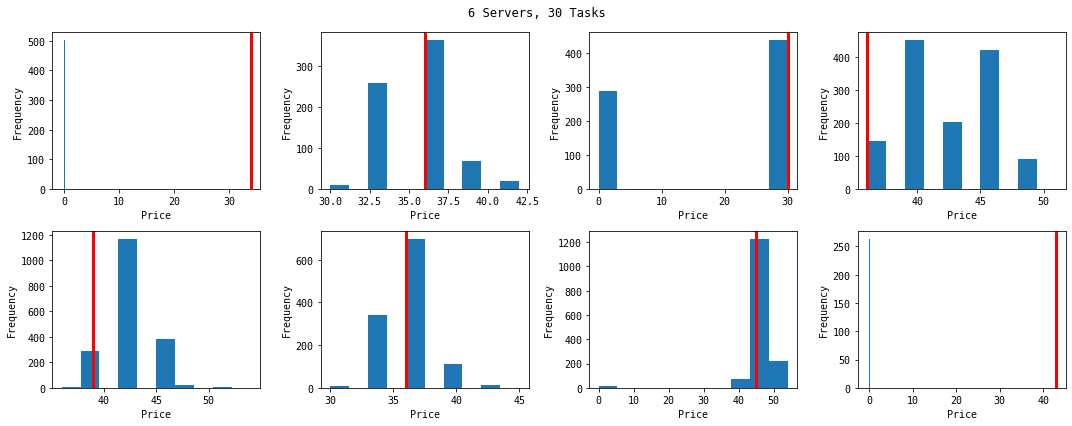

In [10]:
_, gs_ax = plt.subplots(2, ceil(len(grid_search_filenames) / 3), figsize=(15, 6))
gs_ax = gs_ax.flatten()

for ax, filename in zip(gs_ax, grid_search_filenames):
    with open(f'{folder}/{filename}') as file:
        results_data = json.load(file)
        
        prices = [results['task price'] for name, results in results_data.items() if name != "model" and name != "no mutation"]
        ax.hist(prices, bins=10)
        
        mutant_task = results_data['Mutation 0']['mutated task']
        original_price = results_data['no mutation']['task price']
        ax.axvline(x=original_price, color='red', linewidth=3)
        
        ax.set_xlabel('Price')
        ax.set_ylabel('Frequency')
plt.suptitle('6 Servers, 30 Tasks')
plt.tight_layout()

save_plot('grid_search', 'mutation')